# Import Libraries

In [ ]:
#Importing relevant libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import metrics
import graphviz
import xgboost

# Importing Data

In [ ]:
sklearn.datasets.fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
house_price_data = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(house_price_data.data, columns=house_price_data.feature_names)
df['target'] = house_price_data.target

In [ ]:
df.shape

(20640, 9)

# Data Quality Exploration

In [ ]:
def explore_data(df):
  # Checking for missing values
  print("Missing values per column:")
  print(df.isnull().sum().sort_values(ascending=False))
  # Displaying data types
  print("**********")
  print("\nData types of columns:")
  print(df.dtypes)
  # Displaying descriptive statistics
  print("**********")
  print("\nDescriptive statistics:")
  print(df.describe())
  # Check for even distribution of classes
  print("**********")
  print("\nClass distribution:")
  print(df[df.columns[-1]].value_counts())

In [ ]:
explore_data(df)

Missing values per column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
**********

Data types of columns:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object
**********

Descriptive statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.0487

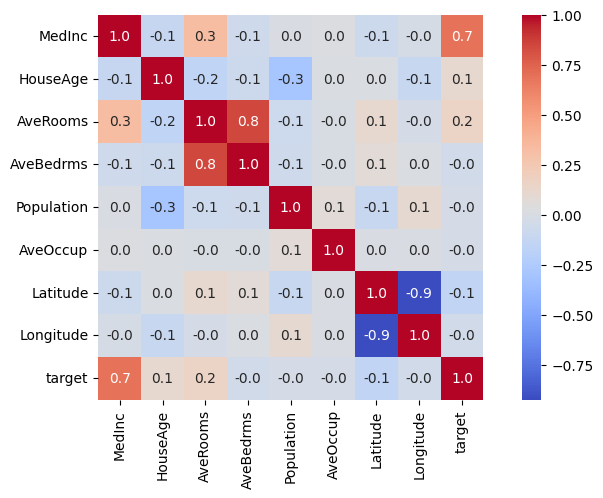

In [ ]:
#Exploring correlation

corr_matrix = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, square = True, fmt = '.1f', cmap='coolwarm')
plt.show()

# Data Preparation and Model Training

In [ ]:
#Separating Features from Labels
X = df.drop(df.columns[-1], axis=1)
Y = df[df.columns[-1]]

In [ ]:
#Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [ ]:
# Train a XGBoost model
model = XGBRegressor()
model.fit(X_train, Y_train)

# Evaluate the model
# Accuracy on training data
X_train_prediction = model.predict(X_train)
accuracy_score_1 = metrics.r2_score(Y_train, X_train_prediction)
accuracy_score_2 = metrics.mean_absolute_error(Y_train, X_train_prediction)

# Accuracy on test data
X_test_prediction = model.predict(X_test)
accuracy_score_3 = metrics.r2_score(Y_test, X_test_prediction)
accuracy_score_4 = metrics.mean_absolute_error(Y_test, X_test_prediction)

print('R2 on training data:', accuracy_score_1)
print('MAE on training data:', accuracy_score_2)
print('R2 on test data:', accuracy_score_3)
print('MAE on test data:', accuracy_score_4)

R2 on training data: 0.943650140819218
MAE on training data: 0.1933648700612105
R2 on test data: 0.8338000331788725
MAE on test data: 0.3108631800268186
